## Keras -- MLPs on MNIST

In [0]:
# if you keras is not using tensorflow as backend set "KERAS_BACKEND=tensorflow" use this command
from keras.utils import np_utils 
from keras.datasets import mnist 
import seaborn as sns
from keras.initializers import RandomNormal

Using TensorFlow backend.


In [0]:
%matplotlib notebook
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import time
# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# https://stackoverflow.com/a/14434334
# this function is used to update the plots for each epoch and error
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

In [0]:
# the data, shuffled and split between train and test sets 
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 2s 0us/step


In [0]:
print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d, %d)"%(X_train.shape[1], X_train.shape[2]))
print("Number of training examples :", X_test.shape[0], "and each image is of shape (%d, %d)"%(X_test.shape[1], X_test.shape[2]))

Number of training examples : 60000 and each image is of shape (28, 28)
Number of training examples : 10000 and each image is of shape (28, 28)


In [0]:
# if you observe the input shape its 2 dimensional vector
# for each image we have a (28*28) vector
# we will convert the (28*28) vector into single dimensional vector of 1 * 784 

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2]) 
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2]) 

In [0]:
# after converting the input images from 3d to 2d vectors

print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d)"%(X_train.shape[1]))
print("Number of training examples :", X_test.shape[0], "and each image is of shape (%d)"%(X_test.shape[1]))

Number of training examples : 60000 and each image is of shape (784)
Number of training examples : 10000 and each image is of shape (784)


In [0]:
# An example data point
print(X_train[0])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 247 241   0   0   0   0   

<h2>Normalize the data</h2>

In [0]:
# if we observe the above matrix each cell is having a value between 0-255
# before we move to apply machine learning algorithms lets try to normalize the data
# X => (X - Xmin)/(Xmax-Xmin) = X/255

X_train = X_train/255
X_test = X_test/255

In [0]:
# example data point after normlizing
print(X_train[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [0]:
# here we are having a class number for each image
print("Class label of first image :", y_train[0])

# lets convert this into a 10 dimensional vector
# ex: consider an image is 5 convert it into 5 => [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
# this conversion needed for MLPs 

Y_train = np_utils.to_categorical(y_train, 10) 
Y_test = np_utils.to_categorical(y_test, 10)

print("After converting the output into a vector : ",Y_train[0])

Class label of first image : 5
After converting the output into a vector :  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


<h2>  Softmax classifier  </h2>

In [0]:
# https://keras.io/getting-started/sequential-model-guide/

# The Sequential model is a linear stack of layers.
# you can create a Sequential model by passing a list of layer instances to the constructor:

# model = Sequential([
#     Dense(32, input_shape=(784,)),
#     Activation('relu'),
#     Dense(10),
#     Activation('softmax'),
# ])

# You can also simply add layers via the .add() method:

# model = Sequential()
# model.add(Dense(32, input_dim=784))
# model.add(Activation('relu'))

###

# https://keras.io/layers/core/

# keras.layers.Dense(units, activation=None, use_bias=True, kernel_initializer='glorot_uniform', 
# bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, 
# kernel_constraint=None, bias_constraint=None)

# Dense implements the operation: output = activation(dot(input, kernel) + bias) where
# activation is the element-wise activation function passed as the activation argument, 
# kernel is a weights matrix created by the layer, and 
# bias is a bias vector created by the layer (only applicable if use_bias is True).

# output = activation(dot(input, kernel) + bias)  => y = activation(WT. X + b)

####

# https://keras.io/activations/

# Activations can either be used through an Activation layer, or through the activation argument supported by all forward layers:

# from keras.layers import Activation, Dense

# model.add(Dense(64))
# model.add(Activation('tanh'))

# This is equivalent to:
# model.add(Dense(64, activation='tanh'))

# there are many activation functions ar available ex: tanh, relu, softmax


from keras.models import Sequential 
from keras.layers import Dense, Activation 


In [0]:
# some model parameters

output_dim = 10
input_dim = X_train.shape[1]

batch_size = 128 
nb_epoch = 20

<h2> Model 1 : MLP + ReLU + ADAM </h2>

In [0]:
model_relu = Sequential()
model_relu.add(Dense(324, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
model_relu.add(Dense(108, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
model_relu.add(Dense(output_dim, activation='softmax'))

print(model_relu.summary())

model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

W0728 09:41:24.063638 139911311832960 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0728 09:41:24.105846 139911311832960 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0728 09:41:24.116193 139911311832960 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4115: The name tf.random_normal is deprecated. Please use tf.random.normal instead.

W0728 09:41:24.149391 139911311832960 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0728 09:41:24.171610 139911311832960 deprecation_wra

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 324)               254340    
_________________________________________________________________
dense_2 (Dense)              (None, 108)               35100     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1090      
Total params: 290,530
Trainable params: 290,530
Non-trainable params: 0
_________________________________________________________________
None
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 6s 108us/step - loss: 0.2468 - acc: 0.9263 - val_loss: 0.1157 - val_acc: 0.9659
Epoch 2/20
60000/60000 [==============================] - 3s 46us/step - loss: 0.0939 - acc: 0.9720 - val_loss: 0.0882 - val_acc: 0.9732
Epoch 3/20
60000/60000 [==============================] - 3s 46us/step

**Train Accuracy = 99.75%**

Test score: 0.10035708108908771
Test accuracy: 0.9794


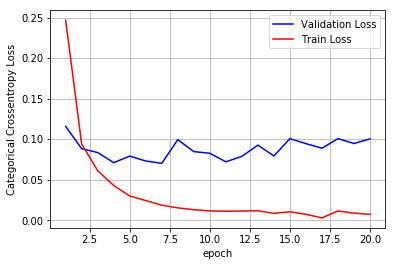

In [0]:
score = model_relu.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

model_test_score = score[0]
model_test_acc = score[1]
model_train = history.history['acc']

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs


vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<h2> MLP + Batch-Norm on hidden Layers + AdamOptimizer </2>

In [0]:
from keras.layers.normalization import BatchNormalization

model_batch = Sequential()

model_batch.add(Dense(324, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
model_batch.add(BatchNormalization())

model_batch.add(Dense(108, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_batch.add(BatchNormalization())

model_batch.add(Dense(output_dim, activation='softmax'))

model_batch.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_batch.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 5s 86us/step - loss: 0.2165 - acc: 0.9363 - val_loss: 0.1146 - val_acc: 0.9670
Epoch 2/20
60000/60000 [==============================] - 4s 74us/step - loss: 0.0809 - acc: 0.9754 - val_loss: 0.0907 - val_acc: 0.9728
Epoch 3/20
60000/60000 [==============================] - 4s 74us/step - loss: 0.0523 - acc: 0.9845 - val_loss: 0.0789 - val_acc: 0.9754
Epoch 4/20
60000/60000 [==============================] - 4s 74us/step - loss: 0.0367 - acc: 0.9889 - val_loss: 0.0728 - val_acc: 0.9779
Epoch 5/20
60000/60000 [==============================] - 4s 75us/step - loss: 0.0301 - acc: 0.9908 - val_loss: 0.0721 - val_acc: 0.9773
Epoch 6/20
60000/60000 [==============================] - 4s 75us/step - loss: 0.0237 - acc: 0.9928 - val_loss: 0.0747 - val_acc: 0.9777
Epoch 7/20
60000/60000 [==============================] - 5s 76us/step - loss: 0.0216 - acc: 0.9929 - val_loss: 0.0773 - val_acc

**Train Accuracy  = 99.77%**

Test score: 0.07929278038347275
Test accuracy: 0.9802


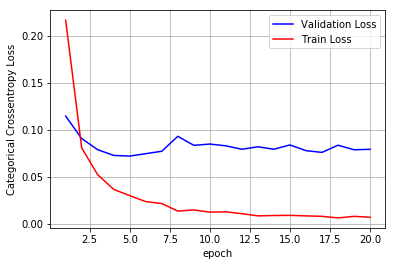

In [0]:
score = model_batch.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<h2> 5. MLP + Dropout + AdamOptimizer </h2>

In [0]:
# https://stackoverflow.com/questions/34716454/where-do-i-call-the-batchnormalization-function-in-keras

from keras.layers import Dropout

model_drop = Sequential()

model_drop.add(Dense(324, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(108, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(output_dim, activation='softmax'))


model_drop.summary()

W0728 10:01:15.132498 139911311832960 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 324)               254340    
_________________________________________________________________
batch_normalization_3 (Batch (None, 324)               1296      
_________________________________________________________________
dropout_1 (Dropout)          (None, 324)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 108)               35100     
_________________________________________________________________
batch_normalization_4 (Batch (None, 108)               432       
_________________________________________________________________
dropout_2 (Dropout)          (None, 108)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)                1090      
Total para

In [0]:
model_drop.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 5s 90us/step - loss: 0.5430 - acc: 0.8353 - val_loss: 0.1843 - val_acc: 0.9431
Epoch 2/20
60000/60000 [==============================] - 5s 78us/step - loss: 0.2851 - acc: 0.9163 - val_loss: 0.1363 - val_acc: 0.9570
Epoch 3/20
60000/60000 [==============================] - 5s 78us/step - loss: 0.2328 - acc: 0.9307 - val_loss: 0.1152 - val_acc: 0.9632
Epoch 4/20
60000/60000 [==============================] - 5s 78us/step - loss: 0.2003 - acc: 0.9401 - val_loss: 0.1024 - val_acc: 0.9694
Epoch 5/20
60000/60000 [==============================] - 5s 78us/step - loss: 0.1782 - acc: 0.9463 - val_loss: 0.0930 - val_acc: 0.9711
Epoch 6/20
60000/60000 [==============================] - 5s 79us/step - loss: 0.1635 - acc: 0.9519 - val_loss: 0.0893 - val_acc: 0.9735
Epoch 7/20
60000/60000 [==============================] - 5s 78us/step - loss: 0.1514 - acc: 0.9537 - val_loss: 0.0866 - val_acc

<h2>Train Accuracy = 97.39%

Test score: 0.06887181369569152
Test accuracy: 0.9796


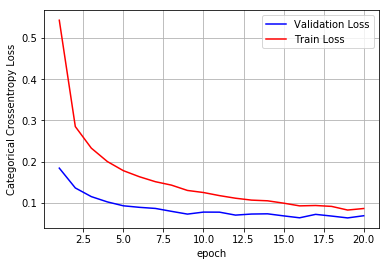

In [0]:
score = model_drop.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<H2>Model 2 :  (3 Layered ) MLP + ReLU + ADAM</2>
                                     

In [0]:
from keras.initializers import he_normal

model_relu = Sequential()
model_relu.add(Dense(356, activation='relu', input_shape=(input_dim,), kernel_initializer=he_normal(seed=None)))
model_relu.add(Dense(105, activation='relu', kernel_initializer=he_normal(seed=None)) )
model_relu.add(Dense(51, activation='relu', kernel_initializer=he_normal(seed=None)) )
model_relu.add(Dense(output_dim, activation='softmax'))

print(model_relu.summary())

model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 356)               279460    
_________________________________________________________________
dense_11 (Dense)             (None, 105)               37485     
_________________________________________________________________
dense_12 (Dense)             (None, 51)                5406      
_________________________________________________________________
dense_13 (Dense)             (None, 10)                520       
Total params: 322,871
Trainable params: 322,871
Non-trainable params: 0
_________________________________________________________________
None
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 4s 58us/step - loss: 0.2576 - acc: 0.9233 - val_loss: 0.1140 - val_acc: 0.9645
Epoch 2/20
60000/60000 [==============================] - 3s 50us/step - los

<h2>Train Accuracy=99.64%</h2>

Test score: 0.08639832216318823
Test accuracy: 0.983


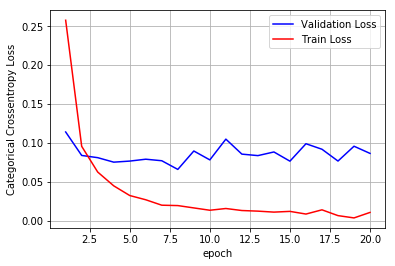

In [0]:
score = model_relu.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

model_test_score = score[0]
model_test_acc = score[1]
model_train = history.history['acc']

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs


vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<h2> MLP + Batch-Norm on hidden Layers + AdamOptimizer </2>

In [0]:
from keras.layers.normalization import BatchNormalization

model_batch = Sequential()

model_batch.add(Dense(356, activation='relu', input_shape=(input_dim,), kernel_initializer=he_normal(seed=None)))
model_batch.add(BatchNormalization())

model_batch.add(Dense(105, activation='relu', kernel_initializer=he_normal(seed=None)) )
model_batch.add(BatchNormalization())

model_batch.add(Dense(51, activation='relu', kernel_initializer=he_normal(seed=None)) )
model_batch.add(BatchNormalization())

model_batch.add(Dense(output_dim, activation='softmax'))

model_batch.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_batch.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 7s 120us/step - loss: 0.2287 - acc: 0.9336 - val_loss: 0.1145 - val_acc: 0.9643
Epoch 2/20
60000/60000 [==============================] - 6s 96us/step - loss: 0.0844 - acc: 0.9748 - val_loss: 0.0870 - val_acc: 0.9730
Epoch 3/20
60000/60000 [==============================] - 6s 96us/step - loss: 0.0545 - acc: 0.9829 - val_loss: 0.0788 - val_acc: 0.9755
Epoch 4/20
60000/60000 [==============================] - 6s 95us/step - loss: 0.0419 - acc: 0.9863 - val_loss: 0.0909 - val_acc: 0.9719
Epoch 5/20
60000/60000 [==============================] - 6s 97us/step - loss: 0.0343 - acc: 0.9892 - val_loss: 0.0789 - val_acc: 0.9767
Epoch 6/20
60000/60000 [==============================] - 6s 95us/step - loss: 0.0272 - acc: 0.9913 - val_loss: 0.0786 - val_acc: 0.9774
Epoch 7/20
60000/60000 [==============================] - 6s 97us/step - loss: 0.0231 - acc: 0.9927 - val_loss: 0.0800 - val_ac

<h2>Train Accuracy=99.60%</h2>

Test score: 0.08030926787399022
Test accuracy: 0.981


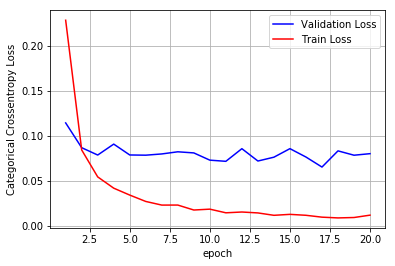

In [0]:
score = model_batch.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<h2> 5. MLP + Dropout + AdamOptimizer </h2>

In [0]:
# https://stackoverflow.com/questions/34716454/where-do-i-call-the-batchnormalization-function-in-keras

from keras.layers import Dropout

model_drop = Sequential()

model_drop.add(Dense(356, activation='relu', input_shape=(input_dim,), kernel_initializer=he_normal(seed=None)))
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(105, activation='relu', kernel_initializer=he_normal(seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(51, activation='relu', kernel_initializer=he_normal(seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(output_dim, activation='softmax'))

model_drop.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 8s 129us/step - loss: 0.7857 - acc: 0.7579 - val_loss: 0.2015 - val_acc: 0.9392
Epoch 2/20
60000/60000 [==============================] - 6s 101us/step - loss: 0.3409 - acc: 0.9055 - val_loss: 0.1470 - val_acc: 0.9549
Epoch 3/20
60000/60000 [==============================] - 6s 100us/step - loss: 0.2589 - acc: 0.9297 - val_loss: 0.1247 - val_acc: 0.9633
Epoch 4/20
60000/60000 [==============================] - 6s 101us/step - loss: 0.2181 - acc: 0.9413 - val_loss: 0.1096 - val_acc: 0.9680
Epoch 5/20
60000/60000 [==============================] - 6s 101us/step - loss: 0.1917 - acc: 0.9476 - val_loss: 0.1011 - val_acc: 0.9707
Epoch 6/20
60000/60000 [==============================] - 6s 100us/step - loss: 0.1708 - acc: 0.9537 - val_loss: 0.0910 - val_acc: 0.9740
Epoch 7/20
60000/60000 [==============================] - 6s 101us/step - loss: 0.1654 - acc: 0.9554 - val_loss: 0.0871 - 

<h2>Train Accuracy=97.51%</h2>

Test score: 0.08030926787399022
Test accuracy: 0.981


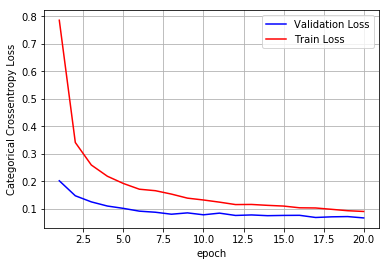

In [0]:
score = model_batch.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<H2>Model 3 :  (5 Layered ) MLP + ReLU + ADAM</2>
                                     

In [0]:
from keras.initializers import he_normal

model_relu = Sequential()
model_relu.add(Dense(507, activation='relu', input_shape=(input_dim,), kernel_initializer=he_normal(seed=None)))
model_relu.add(Dense(312, activation='relu', kernel_initializer=he_normal(seed=None)) )
model_relu.add(Dense(212, activation='relu', kernel_initializer=he_normal(seed=None)) )
model_relu.add(Dense(126, activation='relu', kernel_initializer=he_normal(seed=None)) )
model_relu.add(Dense(84, activation='relu', kernel_initializer=he_normal(seed=None)) )
model_relu.add(Dense(output_dim, activation='softmax'))

print(model_relu.summary())

model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 507)               397995    
_________________________________________________________________
dense_23 (Dense)             (None, 312)               158496    
_________________________________________________________________
dense_24 (Dense)             (None, 212)               66356     
_________________________________________________________________
dense_25 (Dense)             (None, 126)               26838     
_________________________________________________________________
dense_26 (Dense)             (None, 84)                10668     
_________________________________________________________________
dense_27 (Dense)             (None, 10)                850       
Total params: 661,203
Trainable params: 661,203
Non-trainable params: 0
_________________________________________________________________
None

<h2>Train Accuracy=99.73%</h2>

Test score: 0.08030926787399022
Test accuracy: 0.981


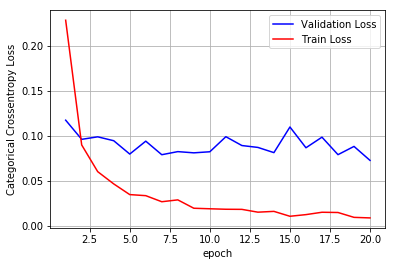

In [0]:
score = model_batch.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<h2> MLP + Batch-Norm on hidden Layers + AdamOptimizer </2>

In [0]:
from keras.layers.normalization import BatchNormalization

model_batch = Sequential()

model_batch.add(Dense(507, activation='relu', input_shape=(input_dim,), kernel_initializer=he_normal(seed=None)))
model_batch.add(BatchNormalization())

model_batch.add(Dense(312, activation='relu', kernel_initializer=he_normal(seed=None)) )
model_batch.add(BatchNormalization())

model_batch.add(Dense(212, activation='relu', kernel_initializer=he_normal(seed=None)) )
model_batch.add(BatchNormalization())

model_batch.add(Dense(126, activation='relu', kernel_initializer=he_normal(seed=None)) )
model_batch.add(BatchNormalization())

model_batch.add(Dense(84, activation='relu', kernel_initializer=he_normal(seed=None)) )
model_batch.add(BatchNormalization())

model_batch.add(Dense(output_dim, activation='softmax'))

model_batch.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_batch.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 11s 183us/step - loss: 0.2148 - acc: 0.9356 - val_loss: 0.1066 - val_acc: 0.9677
Epoch 2/20
60000/60000 [==============================] - 9s 147us/step - loss: 0.0867 - acc: 0.9731 - val_loss: 0.0811 - val_acc: 0.9742
Epoch 3/20
60000/60000 [==============================] - 9s 148us/step - loss: 0.0587 - acc: 0.9815 - val_loss: 0.0947 - val_acc: 0.9702
Epoch 4/20
60000/60000 [==============================] - 9s 149us/step - loss: 0.0505 - acc: 0.9831 - val_loss: 0.0926 - val_acc: 0.9711
Epoch 5/20
60000/60000 [==============================] - 9s 149us/step - loss: 0.0407 - acc: 0.9867 - val_loss: 0.0816 - val_acc: 0.9761
Epoch 6/20
60000/60000 [==============================] - 9s 148us/step - loss: 0.0365 - acc: 0.9879 - val_loss: 0.0848 - val_acc: 0.9742
Epoch 7/20
60000/60000 [==============================] - 9s 149us/step - loss: 0.0302 - acc: 0.9899 - val_loss: 0.0784 -

<h2>Train Accuracy=99.57%</h2>

Test score: 0.0658267695394985
Test accuracy: 0.9831


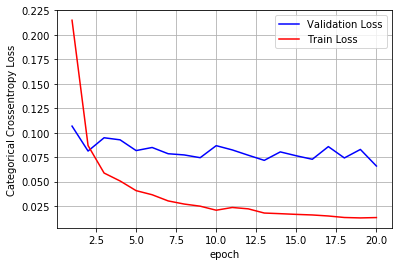

In [0]:
score = model_batch.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<h2> 5. MLP + Dropout + AdamOptimizer </h2>

In [0]:
# https://stackoverflow.com/questions/34716454/where-do-i-call-the-batchnormalization-function-in-keras

from keras.layers import Dropout

model_drop = Sequential()

model_drop.add(Dense(507, activation='relu', input_shape=(input_dim,), kernel_initializer=he_normal(seed=None)))
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(312, activation='relu', kernel_initializer=he_normal(seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(212, activation='relu', kernel_initializer=he_normal(seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(126, activation='relu', kernel_initializer=he_normal(seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(84, activation='relu', kernel_initializer=he_normal(seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(output_dim, activation='softmax'))

model_drop.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 12s 201us/step - loss: 1.1379 - acc: 0.6438 - val_loss: 0.2566 - val_acc: 0.9249
Epoch 2/20
60000/60000 [==============================] - 9s 156us/step - loss: 0.3986 - acc: 0.8896 - val_loss: 0.1720 - val_acc: 0.9503
Epoch 3/20
60000/60000 [==============================] - 9s 156us/step - loss: 0.2922 - acc: 0.9221 - val_loss: 0.1444 - val_acc: 0.9598
Epoch 4/20
60000/60000 [==============================] - 9s 156us/step - loss: 0.2413 - acc: 0.9353 - val_loss: 0.1243 - val_acc: 0.9661
Epoch 5/20
60000/60000 [==============================] - 9s 157us/step - loss: 0.2142 - acc: 0.9436 - val_loss: 0.1076 - val_acc: 0.9711
Epoch 6/20
60000/60000 [==============================] - 9s 157us/step - loss: 0.1873 - acc: 0.9498 - val_loss: 0.1088 - val_acc: 0.9701
Epoch 7/20
60000/60000 [==============================] - 9s 157us/step - loss: 0.1751 - acc: 0.9537 - val_loss: 0.0930 -

<h2>Train Accuracy=97.60%</h2>

Test score: 0.0658267695394985
Test accuracy: 0.9831


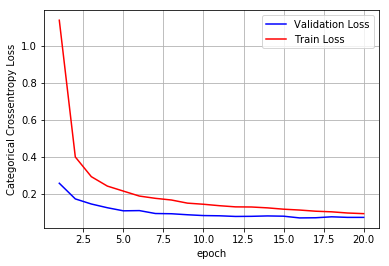

In [0]:
score = model_batch.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

In [1]:
# Please compare all your models using Prettytable library
# http://zetcode.com/python/prettytable/

from prettytable import PrettyTable

#If you get a ModuleNotFoundError error , install prettytable using: pip3 install prettytable

x = PrettyTable()
x.field_names = ["Hidden Layers", "Activation Unit","Optimiser", "Batch Normalisation", "DropOut(0.5)"," Train Accuracy","Test_Accuracy"]
x.add_row(["2", "ReLU","Adam","-","-" ,"99.75%", "97.94%"])
x.add_row(["2", "ReLU","Adam","Yes","-" ,"99.77%", "98.02%"])
x.add_row(["2", "ReLU","Adam","Yes","0.5" ,"97.39%", "97.96%"])

x.add_row(["2", "ReLU","Adam","-","-" ,"99.64%", "98.3%"])
x.add_row(["2", "ReLU","Adam","Yes","-" ,"99.60%", "98.1%"])
x.add_row(["2", "ReLU","Adam","Yes","0.5" ,"97.51%", "98.1%"])

x.add_row(["2", "ReLU","Adam","-","-" ,"99.73%", "98.1%"])
x.add_row(["2", "ReLU","Adam","Yes","-" ,"99.57%", "97.31%"])
x.add_row(["2", "ReLU","Adam","Yes","0.5" ,"97.60%", "98.31%"])

print(x)

+---------------+-----------------+-----------+---------------------+--------------+-----------------+---------------+
| Hidden Layers | Activation Unit | Optimiser | Batch Normalisation | DropOut(0.5) |  Train Accuracy | Test_Accuracy |
+---------------+-----------------+-----------+---------------------+--------------+-----------------+---------------+
|       2       |       ReLU      |    Adam   |          -          |      -       |      99.75%     |     97.94%    |
|       2       |       ReLU      |    Adam   |         Yes         |      -       |      99.77%     |     98.02%    |
|       2       |       ReLU      |    Adam   |         Yes         |     0.5      |      97.39%     |     97.96%    |
|       2       |       ReLU      |    Adam   |          -          |      -       |      99.64%     |     98.3%     |
|       2       |       ReLU      |    Adam   |         Yes         |      -       |      99.60%     |     98.1%     |
|       2       |       ReLU      |    Adam   | 

<h2>Conclusion:</h2>

1. While using Batch Normalisation and Dropouts together,we get better results with good accuracy.  
2. Model 3 with many layeres gave better results compared to Model 1 and Model 2.  